# <b> <font color= #ABFF00> Walmart EDA(Exploratory Data Analysis)

### <b><font color= #FFFF00> General Topics:
- #### *Import the libraries*
- #### *Load the Dataset*
- #### *Drop Duplicate Rows*
- #### *Change column format(if need)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\B_Data_Anlysist_Project\Python_Projects\02_Walmart_EDA\eda_walmart_sales_dataset.csv")
df.head()

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
0,ORD-100000,2024-08-10,CUST-2824,Jeffrey Jacobs,Velezburgh,East,Furniture,7,238.76,34.49
1,ORD-100001,2024-02-28,CUST-1409,Jacob Walker,South Alyssamouth,West,Office Supplies,4,675.17,159.79
2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49
3,ORD-100003,2023-11-26,CUST-5012,Maxwell Reed,Penamouth,East,Technology,5,113.07,20.42
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       1000 non-null   object 
 1   Order Date     1000 non-null   object 
 2   Customer ID    1000 non-null   object 
 3   Customer Name  1000 non-null   object 
 4   City           1000 non-null   object 
 5   Region         1000 non-null   object 
 6   Category       1000 non-null   object 
 7   Quantity       1000 non-null   int64  
 8   Sales          1000 non-null   float64
 9   Profit         1000 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


In [3]:
df.drop_duplicates(inplace= True)

In [4]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       1000 non-null   object        
 1   Order Date     1000 non-null   datetime64[ns]
 2   Customer ID    1000 non-null   object        
 3   Customer Name  1000 non-null   object        
 4   City           1000 non-null   object        
 5   Region         1000 non-null   object        
 6   Category       1000 non-null   object        
 7   Quantity       1000 non-null   int64         
 8   Sales          1000 non-null   float64       
 9   Profit         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 78.3+ KB


### <b><font color= #FFFF00> Q1.Customer Segmentation Challenge:
#### *Identify the top 10% of customers who contributed the most to the total profit. What common characteristics (region, category, city) do they share?*

In [75]:
customer_profit = df.groupby("Customer ID")["Profit"].sum().reset_index()
customer_profit

,Customer ID,Profit
0,CUST-1006,-49.51
1,CUST-1009,5.14
2,CUST-1018,82.38
3,CUST-1027,-3.49
4,CUST-1035,-72.42
...,...,...
949,CUST-9947,23.48
950,CUST-9955,25.25
951,CUST-9976,-32.89
952,CUST-9977,87.23


In [76]:
customer_profit = customer_profit.sort_values(by= "Profit", ascending= False)
customer_profit

,Customer ID,Profit
457,CUST-5333,344.03
700,CUST-7658,303.31
733,CUST-7939,285.50
391,CUST-4824,273.34
144,CUST-2375,264.70
...,...,...
931,CUST-9824,-165.87
650,CUST-7126,-166.61
92,CUST-1949,-168.89
28,CUST-1319,-173.27


In [77]:
top_10_percent_num = int(0.10 * customer_profit.shape[0])
top_10_percent_num

95

In [78]:
top_10_percent_df = customer_profit.head(top_10_percent_num)
top_10_percent_df

,Customer ID,Profit
457,CUST-5333,344.03
700,CUST-7658,303.31
733,CUST-7939,285.50
391,CUST-4824,273.34
144,CUST-2375,264.70
...,...,...
530,CUST-5889,160.23
37,CUST-1409,159.79
330,CUST-4249,157.66
197,CUST-2874,157.24


In [79]:
top_df = df[df["Customer ID"].isin(top_10_percent_df["Customer ID"])]
top_df

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
1,ORD-100001,2024-02-28,CUST-1409,Jacob Walker,South Alyssamouth,West,Office Supplies,4,675.17,159.79
12,ORD-100012,2025-02-20,CUST-2535,Jessica Burch,West Amandashire,East,Furniture,3,831.92,166.41
26,ORD-100026,2024-12-15,CUST-6574,Sarah Estrada,New Julieville,North,Technology,4,819.27,228.61
32,ORD-100032,2023-12-25,CUST-2519,Michael Anderson,Davidfurt,East,Technology,5,627.91,187.22
37,ORD-100037,2024-03-05,CUST-5333,Brian Wise,Port Gary,South,Furniture,9,948.97,91.60
...,...,...,...,...,...,...,...,...,...,...
958,ORD-100958,2024-06-15,CUST-4804,Andrew Smith,New Carloshaven,East,Furniture,4,928.80,167.65
963,ORD-100963,2024-02-24,CUST-1153,Joshua Decker,North Meganshire,South,Office Supplies,7,616.81,169.91
973,ORD-100973,2024-02-20,CUST-5097,Tracy Russell,Lake Damon,North,Furniture,1,848.05,219.75
980,ORD-100980,2023-12-03,CUST-4886,Chris Flores,Lake Denise,West,Technology,6,778.68,181.73


### <b><font color= #FFFF00> Region column:

In [84]:
region = top_df["Region"].value_counts()
region_index = region.index
region_values = region.values

In [90]:
region = top_df["Region"].value_counts()
region

Region
West     30
East     26
North    25
South    25
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

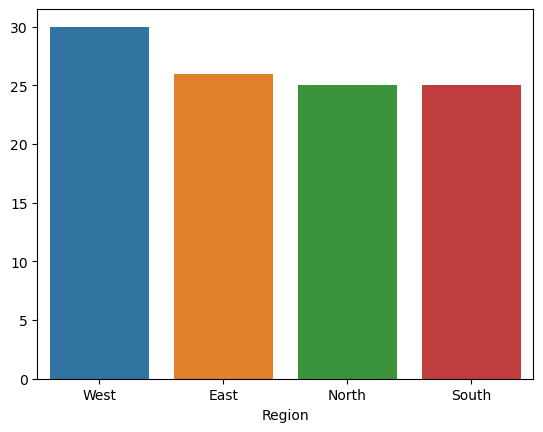

In [89]:
sns.barplot(x= region_index, y= region_values)
plt.show

### <b><font color= #FFFF00> Category column:

In [92]:
category = top_df["Category"].value_counts()
category_index = category.index
category_value = category.values

In [71]:
print(top_df["Category"].value_counts())

Category
Furniture          39
Office Supplies    37
Technology         30
Name: count, dtype: int64


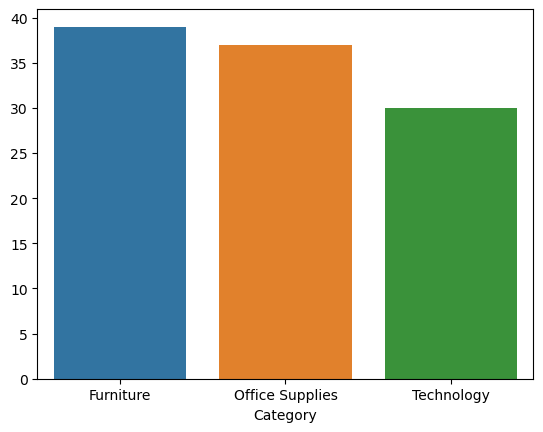

In [95]:
sns.barplot(x= category_index,y= category_value)
plt.show()

In [72]:
print(top_df["City"].value_counts().head(10))

City
South Megan          2
South Alyssamouth    1
Reyesmouth           1
North Sandyfurt      1
South Ashleyhaven    1
Craigport            1
New Stephanie        1
Ricefurt             1
Melissatown          1
New Rachaelhaven     1
Name: count, dtype: int64


### <b> <font color= #ABFF00> Conclusion:
- #### `Region`: Distribution is fairly even, but [East] has a slight edge.
- #### `Category`: [Furniture] appears more frequently.
- #### `City`: One or two cities like [South Megan] show up more than once, but no strong city dominance.

### <b><font color= #FFFF00> Q2. Monthly Sales Recovery Strategy:
#### *Determine which month in the past year had the lowest overall profit. What specific product category and region contributed most to this loss?*

In [96]:
df_loss = pd.DataFrame(df)
df_loss.head()

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
0,ORD-100000,2024-08-10,CUST-2824,Jeffrey Jacobs,Velezburgh,East,Furniture,7,238.76,34.49
1,ORD-100001,2024-02-28,CUST-1409,Jacob Walker,South Alyssamouth,West,Office Supplies,4,675.17,159.79
2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49
3,ORD-100003,2023-11-26,CUST-5012,Maxwell Reed,Penamouth,East,Technology,5,113.07,20.42
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20


In [97]:
df_loss["Order Date"].nunique()

537

In [98]:
df_loss["Year"] = df_loss["Order Date"].dt.year

In [99]:
df_loss["Month"] = df_loss["Order Date"].dt.month

In [100]:
df_loss["Year"].unique()

array([2024, 2023, 2025])

In [101]:
df_loss["Year"].value_counts()

Year
2024    492
2025    275
2023    233
Name: count, dtype: int64

In [102]:
df_2024 = df_loss[df_loss["Year"] == 2024]
df_2024

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit,Year,Month
0,ORD-100000,2024-08-10,CUST-2824,Jeffrey Jacobs,Velezburgh,East,Furniture,7,238.76,34.49,2024,8
1,ORD-100001,2024-02-28,CUST-1409,Jacob Walker,South Alyssamouth,West,Office Supplies,4,675.17,159.79,2024,2
2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49,2024,8
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20,2024,11
5,ORD-100005,2024-09-25,CUST-3286,Aaron Duncan,West Brookeburgh,North,Technology,3,186.76,5.75,2024,9
...,...,...,...,...,...,...,...,...,...,...,...,...
993,ORD-100993,2024-03-29,CUST-6772,Carol Matthews,Lawsonton,East,Furniture,2,842.30,8.19,2024,3
994,ORD-100994,2024-10-24,CUST-4588,Matthew Chambers,South Stephenburgh,North,Technology,7,735.47,139.87,2024,10
995,ORD-100995,2024-04-11,CUST-4115,Kristi Larson,Jenniferburgh,West,Technology,8,546.81,20.87,2024,4
996,ORD-100996,2024-02-13,CUST-5106,William Lopez,Jensenport,East,Furniture,1,594.44,28.99,2024,2


### <b><font color= #FFFF00> Monthly profit:

In [103]:
df_2024_months = df_2024.groupby("Month")["Profit"].sum().reset_index()
df_2024_months

,Month,Profit
0,1,149.47
1,2,1795.80
2,3,-252.22
3,4,1330.69
4,5,107.94
5,6,1213.24
6,7,1052.02
7,8,792.76
8,9,1241.87
9,10,1224.80


In [104]:
df_2024_months = df_2024_months.sort_values(by= "Profit", ascending= False)
df_2024_months

,Month,Profit
1,2,1795.80
3,4,1330.69
10,11,1295.25
8,9,1241.87
9,10,1224.80
5,6,1213.24
6,7,1052.02
7,8,792.76
11,12,649.50
0,1,149.47


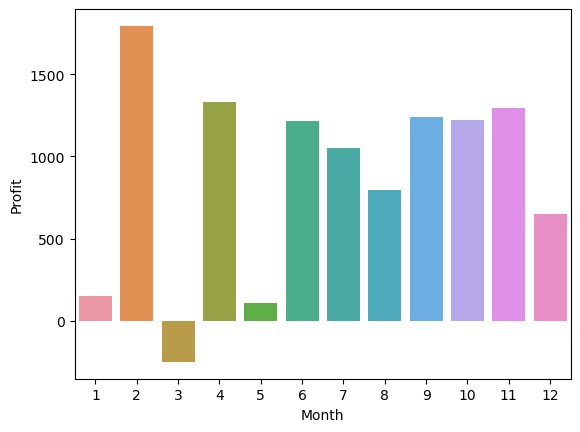

In [105]:
sns.barplot(x= df_2024_months["Month"], y= df_2024_months["Profit"])
plt.show()

In [106]:
df_march = df_2024[df_2024["Month"] == 3]
df_march.head()

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit,Year,Month
8,ORD-100008,2024-03-27,CUST-2424,Suzanne Johnston,Johnsonstad,West,Office Supplies,5,108.45,17.70,2024,3
10,ORD-100010,2024-03-11,CUST-1520,Collin Anderson,New Mandyburgh,South,Office Supplies,8,725.04,-109.05,2024,3
37,ORD-100037,2024-03-05,CUST-5333,Brian Wise,Port Gary,South,Furniture,9,948.97,91.60,2024,3
45,ORD-100045,2024-03-12,CUST-6925,James Hodge,New Johnmouth,West,Office Supplies,3,32.24,-4.95,2024,3
64,ORD-100064,2024-03-26,CUST-3803,Leah West,Richardsonfort,West,Furniture,2,214.36,41.65,2024,3


In [107]:
df_march["Profit"].info()

<class 'pandas.core.series.Series'>
Index: 41 entries, 8 to 993
Series name: Profit
Non-Null Count  Dtype  
--------------  -----  
41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


In [108]:
df_march["Profit"].sum()

-252.22000000000003

### <b><font color= #FFFF00> Region wise Distribution:

In [109]:
df_march["Region"].value_counts()

Region
North    13
South    11
West     10
East      7
Name: count, dtype: int64

In [111]:
region = df_march.groupby("Region")["Profit"].sum()
region

Region
East    -282.76
North    574.55
South   -486.86
West     -57.15
Name: Profit, dtype: float64

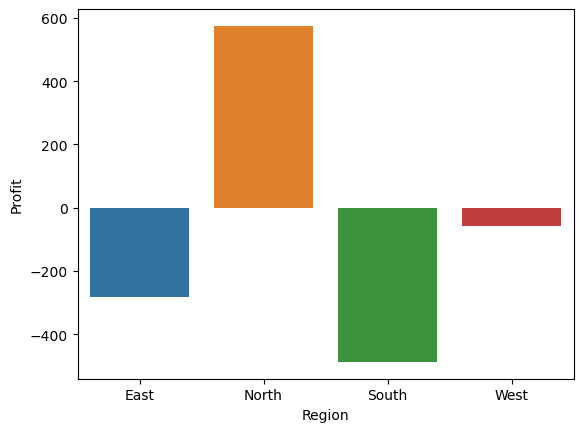

In [112]:
region.index
region.values
sns.barplot(x= region.index, y= region.values)
plt.ylabel("Profit")
plt.show()

### <b><font color= #FFFF00> Category wise Distribution:

In [110]:
df_march["Category"].value_counts()

Category
Office Supplies    18
Furniture          12
Technology         11
Name: count, dtype: int64

In [113]:
Category = df_march.groupby("Category")["Profit"].sum()
Category

Category
Furniture          199.04
Office Supplies   -307.96
Technology        -143.30
Name: Profit, dtype: float64

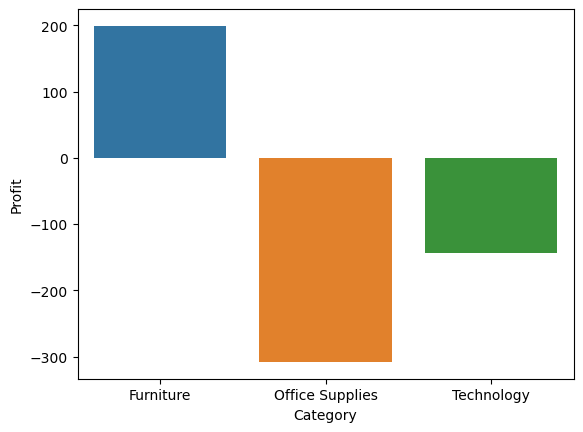

In [114]:
Category.index
Category.values
sns.barplot(x= Category.index, y= Category.values)
plt.ylabel("Profit")
plt.show()

### <b><font color= #FFFF00> Both wise Distribution:

In [115]:
df_march.groupby(["Category","Region"])["Profit"].sum()

Category         Region
Furniture        East     -150.12
                 North     340.85
                 South     -16.23
                 West       24.54
Office Supplies  East     -187.05
                 North     266.55
                 South    -365.34
                 West      -22.12
Technology       East       54.41
                 North     -32.85
                 South    -105.29
                 West      -59.57
Name: Profit, dtype: float64

In [118]:
grouped = df_march.groupby(["Category", "Region"])["Profit"].sum().reset_index()

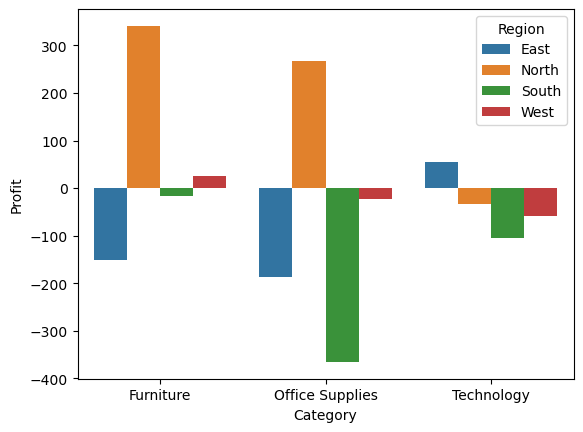

In [119]:
sns.barplot(x="Category", y="Profit", hue="Region", data=grouped)
plt.show()

### <b> <font color= #ABFF00> Conclusion:
- #### Past year is `2024` – 492 records.
- #### `March` Month make the least amount of loss profit. Loss is `-252.22`.
- #### March month dissection Region wise `South` made a more amount of lose. Loss is `-486.86`.
- #### Category wise `Office Supplies` made a more amount of lose. Loss is `-307.96`.
- #### Both `Region` and `Category` wise `south` & `Office Supplies` made a more amount of lose. Loss is `-365.34`.

### <b><font color= #FFFF00> Q3. Profitability Anomaly Detection:
#### *Identify any orders with high sales but negative profit. What patterns do you notice in terms of region, category, or quantity?*

In [120]:
df_anomaly = pd.DataFrame(df)
df_anomaly

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
0,ORD-100000,2024-08-10,CUST-2824,Jeffrey Jacobs,Velezburgh,East,Furniture,7,238.76,34.49
1,ORD-100001,2024-02-28,CUST-1409,Jacob Walker,South Alyssamouth,West,Office Supplies,4,675.17,159.79
2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49
3,ORD-100003,2023-11-26,CUST-5012,Maxwell Reed,Penamouth,East,Technology,5,113.07,20.42
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20
...,...,...,...,...,...,...,...,...,...,...
995,ORD-100995,2024-04-11,CUST-4115,Kristi Larson,Jenniferburgh,West,Technology,8,546.81,20.87
996,ORD-100996,2024-02-13,CUST-5106,William Lopez,Jensenport,East,Furniture,1,594.44,28.99
997,ORD-100997,2025-07-04,CUST-3240,Paul Beck,Samanthaview,North,Office Supplies,9,513.28,-50.13
998,ORD-100998,2025-03-15,CUST-2591,Tracy Flynn,North Stephanietown,South,Technology,7,304.57,29.11


In [121]:
df_neg_profit = df_anomaly[df_anomaly["Profit"] < 0]
df_neg_profit

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20
6,ORD-100006,2024-11-28,CUST-2679,Jamie Nguyen,East Ernest,East,Furniture,7,656.22,-128.18
7,ORD-100007,2024-07-03,CUST-9935,Jessica Pitts,West Michelle,East,Furniture,8,245.80,-18.84
10,ORD-100010,2024-03-11,CUST-1520,Collin Anderson,New Mandyburgh,South,Office Supplies,8,725.04,-109.05
13,ORD-100013,2025-01-08,CUST-4582,Taylor Owens,New Heidi,East,Furniture,6,403.21,-39.51
...,...,...,...,...,...,...,...,...,...,...
981,ORD-100981,2024-04-17,CUST-7248,Nicholas Cruz,Fisherborough,North,Technology,3,659.60,-38.76
988,ORD-100988,2024-12-31,CUST-1132,Eileen Vasquez,Kimberlyville,South,Technology,3,140.41,-8.25
989,ORD-100989,2024-03-18,CUST-1803,Nathan Evans,West Daniel,West,Furniture,2,728.72,-17.11
997,ORD-100997,2025-07-04,CUST-3240,Paul Beck,Samanthaview,North,Office Supplies,9,513.28,-50.13


In [122]:
df_neg_profit.groupby("Category").agg({"Category" : "count"})

,Category
Category,
Furniture,115
Office Supplies,142
Technology,141


In [123]:
df_neg_profit["Quantity"].unique()

array([7, 8, 6, 2, 1, 9, 3, 5, 4], dtype=int64)

### <b><font color= #FFFF00> Furniture Distribution:

In [124]:
df_count_furniture = df_neg_profit[df_neg_profit["Category"] == "Furniture"].groupby("Quantity")["Profit"].count()
df_count_furniture

Quantity
1    16
2    10
3    14
4     7
5     9
6    19
7    14
8    15
9    11
Name: Profit, dtype: int64

In [125]:
df_neg_profit_furniture = df_neg_profit[df_neg_profit["Category"] == "Furniture"].groupby("Quantity")["Profit"].sum()
df_neg_profit_furniture

Quantity
1    -802.44
2    -577.02
3    -805.80
4    -389.89
5    -630.29
6   -1181.15
7    -607.38
8    -688.04
9    -532.80
Name: Profit, dtype: float64

In [126]:
df_furniture = df_neg_profit[df_neg_profit["Category"] == "Furniture"].groupby("Quantity")["Sales"].sum()
df_furniture

Quantity
1    9013.62
2    5562.43
3    7801.78
4    3806.66
5    4987.83
6    9700.03
7    5712.62
8    5971.68
9    5570.56
Name: Sales, dtype: float64

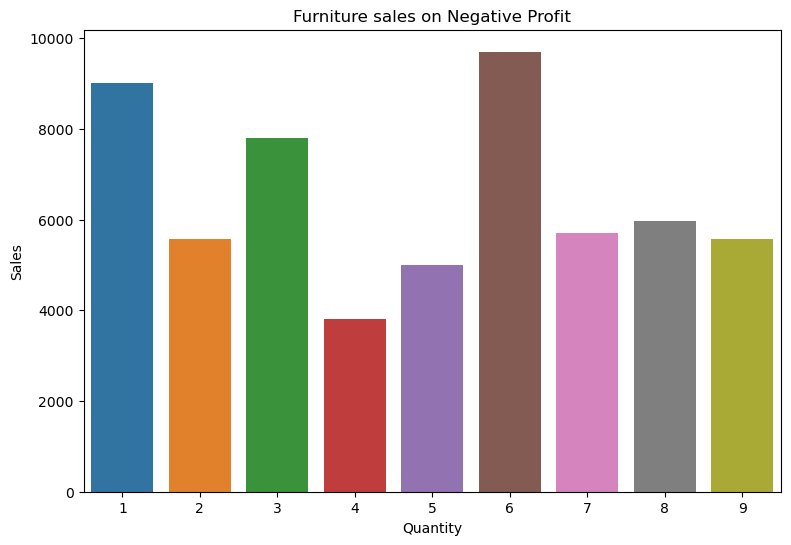

In [127]:
plt.figure(figsize = (9,6))
sns.barplot(x= df_furniture.index, y= df_furniture.values)
plt.title("Furniture sales on Negative Profit")
plt.ylabel("Sales")
plt.show()

### <b><font color= #FFFF00> Office_Suppliers Distribution:

In [128]:
df_count_Office_Supplies = df_neg_profit[df_neg_profit["Category"] == "Office Supplies"].groupby("Quantity")["Profit"].count()
df_count_Office_Supplies

Quantity
1    16
2    13
3    21
4    12
5    17
6    18
7    14
8    15
9    16
Name: Profit, dtype: int64

In [129]:
df_neg_Office_Supplies = df_neg_profit[df_neg_profit["Category"] == "Office Supplies"].groupby("Quantity")["Profit"].sum()
df_neg_Office_Supplies

Quantity
1    -876.00
2    -661.01
3    -924.51
4    -628.67
5    -691.39
6   -1191.58
7    -562.95
8    -725.70
9    -582.02
Name: Profit, dtype: float64

In [130]:
df_Office_Supplies = df_neg_profit[df_neg_profit["Category"] == "Office Supplies"].groupby("Quantity")["Sales"].sum()
df_Office_Supplies

Quantity
1     8454.98
2     5615.46
3    10234.87
4     6603.31
5     8006.98
6     9938.60
7     6935.57
8     7224.52
9     8494.63
Name: Sales, dtype: float64

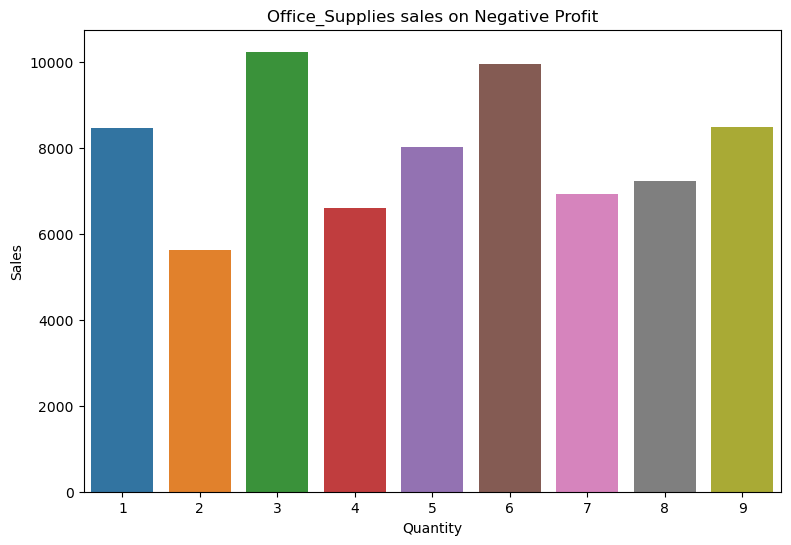

In [131]:
plt.figure(figsize = (9,6))
sns.barplot(x= df_Office_Supplies.index, y= df_Office_Supplies.values)
plt.title("Office_Supplies sales on Negative Profit")
plt.ylabel("Sales")
plt.show()

### <b><font color= #FFFF00> Technology Distribution:

In [132]:
df_count_Technology = df_neg_profit[df_neg_profit["Category"] == "Technology"].groupby("Quantity")["Profit"].count()
df_count_Technology

Quantity
1    19
2    14
3    14
4    16
5    19
6    20
7    14
8    11
9    14
Name: Profit, dtype: int64

In [133]:
df_neg_Technology = df_neg_profit[df_neg_profit["Category"] == "Technology"].groupby("Quantity")["Profit"].sum()
df_neg_Technology

Quantity
1    -965.17
2    -710.43
3    -812.00
4    -604.46
5   -1283.44
6    -960.39
7    -625.54
8    -518.92
9    -884.20
Name: Profit, dtype: float64

In [134]:
df_Technology = df_neg_profit[df_neg_profit["Category"] == "Technology"].groupby("Quantity")["Sales"].sum()
df_Technology

Quantity
1    10400.94
2     6155.91
3     6783.78
4     7235.92
5    11130.52
6    11033.73
7     6800.03
8     5772.87
9     8434.57
Name: Sales, dtype: float64

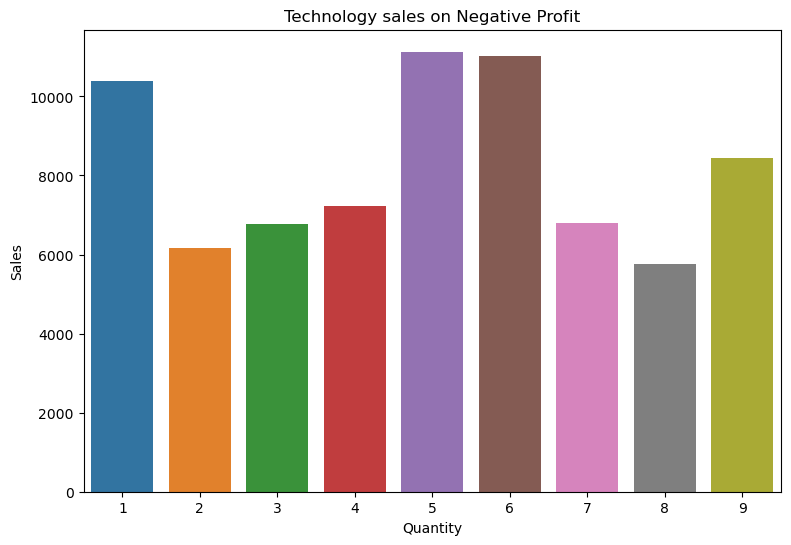

In [135]:
plt.figure(figsize = (9,6))
sns.barplot(x= df_Technology.index, y= df_Technology.values)
plt.title("Technology sales on Negative Profit")
plt.ylabel("Sales")
plt.show()

### <b><font color= #FFFF00> East Region Distribution:

In [136]:
df_neg_profit["Region"].unique()

array(['South', 'East', 'North', 'West'], dtype=object)

In [137]:
df_count_East = df_neg_profit[df_neg_profit["Region"] == "East"].groupby("Quantity")["Profit"].count()
df_count_East

Quantity
1    14
2    10
3    10
4     7
5    11
6    19
7    14
8    13
9    14
Name: Profit, dtype: int64

In [138]:
df_profit_East = df_neg_profit[df_neg_profit["Region"] == "East"].groupby("Quantity")["Profit"].sum()
df_profit_East

Quantity
1    -929.15
2    -454.48
3    -545.82
4    -517.64
5    -451.72
6   -1240.21
7    -704.56
8    -669.10
9    -681.08
Name: Profit, dtype: float64

In [139]:
df_sales_East = df_neg_profit[df_neg_profit["Region"] == "East"].groupby("Quantity")["Sales"].sum()
df_sales_East

Quantity
1     9344.71
2     4328.10
3     4958.74
4     4776.51
5     4709.89
6    10578.75
7     6412.53
8     6265.65
9     7954.16
Name: Sales, dtype: float64

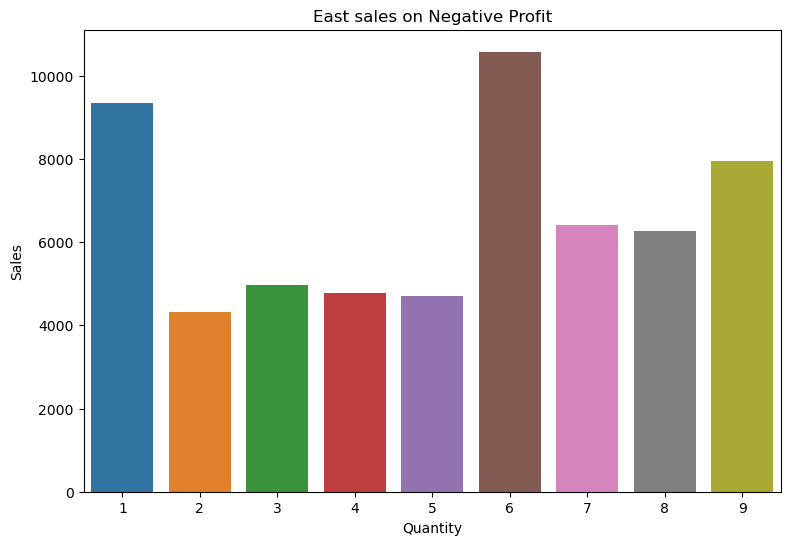

In [140]:
plt.figure(figsize = (9,6))
sns.barplot(x= df_sales_East.index, y= df_sales_East.values)
plt.title("East sales on Negative Profit")
plt.ylabel("Sales")
plt.show()

### <b><font color= #FFFF00> West Region Distribution:

In [141]:
df_profit_West = df_neg_profit[df_neg_profit["Region"] == "West"].groupby("Quantity")["Profit"].count()
df_profit_West

Quantity
1    12
2     9
3    15
4    14
5    13
6    13
7    10
8    15
9    10
Name: Profit, dtype: int64

In [142]:
df_profit_West = df_neg_profit[df_neg_profit["Region"] == "West"].groupby("Quantity")["Profit"].sum()
df_profit_West

Quantity
1   -329.90
2   -150.25
3   -735.72
4   -701.62
5   -590.07
6   -688.36
7   -389.78
8   -794.10
9   -305.97
Name: Profit, dtype: float64

In [143]:
df_sales_West = df_neg_profit[df_neg_profit["Region"] == "West"].groupby("Quantity")["Sales"].sum()
df_sales_West

Quantity
1    6215.65
2    3118.75
3    6925.78
4    6878.59
5    6895.15
6    7319.91
7    4470.00
8    6783.22
9    3736.70
Name: Sales, dtype: float64

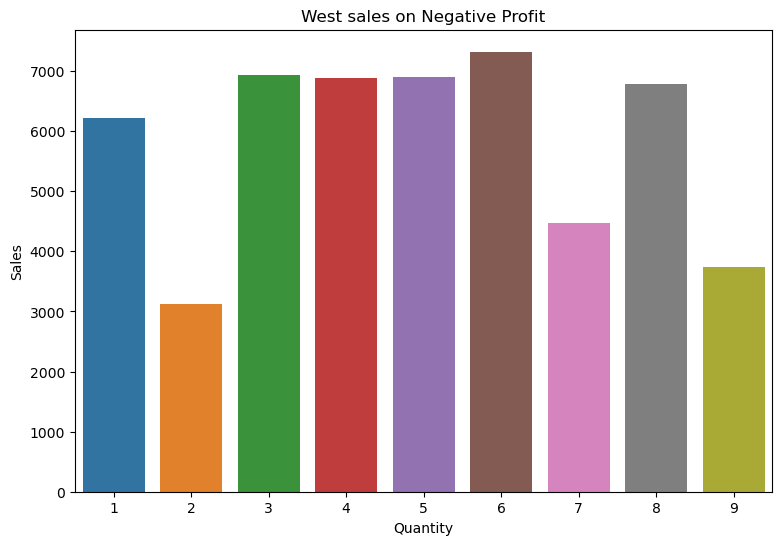

In [144]:
plt.figure(figsize = (9,6))
sns.barplot(x= df_sales_West.index, y= df_sales_West.values)
plt.title("West sales on Negative Profit")
plt.ylabel("Sales")
plt.show()

### <b><font color= #FFFF00> North Region Distribution:

In [145]:
df_profit_North = df_neg_profit[df_neg_profit["Region"] == "North"].groupby("Quantity")["Profit"].count()
df_profit_North

Quantity
1    13
2     6
3    14
4     5
5     7
6     9
7     6
8     9
9    11
Name: Profit, dtype: int64

In [146]:
df_profit_North = df_neg_profit[df_neg_profit["Region"] == "North"].groupby("Quantity")["Profit"].sum()
df_profit_North

Quantity
1   -764.34
2   -285.40
3   -730.11
4   -133.06
5   -623.66
6   -402.46
7   -162.61
8   -299.10
9   -827.33
Name: Profit, dtype: float64

In [147]:
df_profit_North = df_neg_profit[df_neg_profit["Region"] == "North"].groupby("Quantity")["Sales"].sum()
df_profit_North

Quantity
1    5257.83
2    3190.53
3    6243.89
4    2241.93
5    4197.23
6    3641.99
7    1992.01
8    3807.97
9    6971.56
Name: Sales, dtype: float64

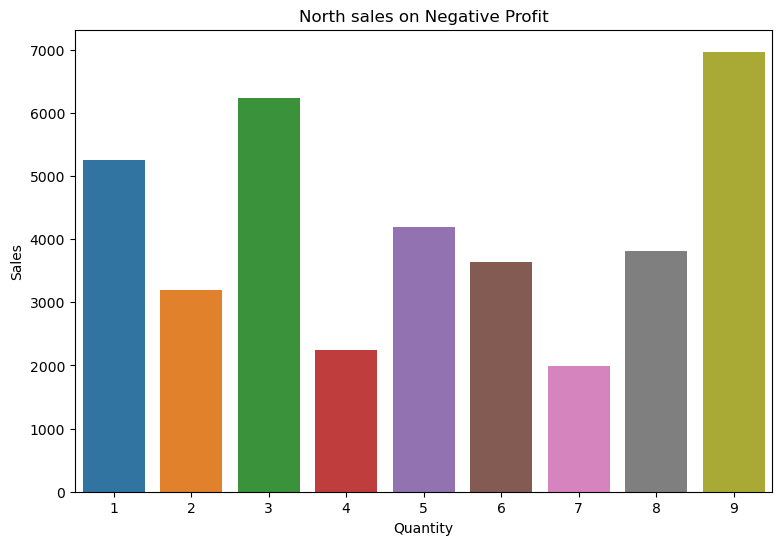

In [148]:
plt.figure(figsize = (9,6))
sns.barplot(x= df_profit_North.index, y= df_profit_North.values)
plt.title("North sales on Negative Profit")
plt.ylabel("Sales")
plt.show()

### <b><font color= #FFFF00> South Region Distribution:

In [149]:
df_profit_South = df_neg_profit[df_neg_profit["Region"] == "South"].groupby("Quantity")["Profit"].count()
df_profit_South

Quantity
1    12
2    12
3    10
4     9
5    14
6    16
7    12
8     4
9     6
Name: Profit, dtype: int64

In [150]:
df_profit_South = df_neg_profit[df_neg_profit["Region"] == "South"].groupby("Quantity")["Profit"].sum()
df_profit_South

Quantity
1    -620.22
2   -1058.33
3    -530.66
4    -270.70
5    -939.67
6   -1002.09
7    -538.92
8    -170.36
9    -184.64
Name: Profit, dtype: float64

In [151]:
df_profit_South = df_neg_profit[df_neg_profit["Region"] == "South"].groupby("Quantity")["Sales"].sum()
df_profit_South

Quantity
1    7051.35
2    6696.42
3    6692.02
4    3748.86
5    8323.06
6    9131.71
7    6573.68
8    2112.23
9    3837.34
Name: Sales, dtype: float64

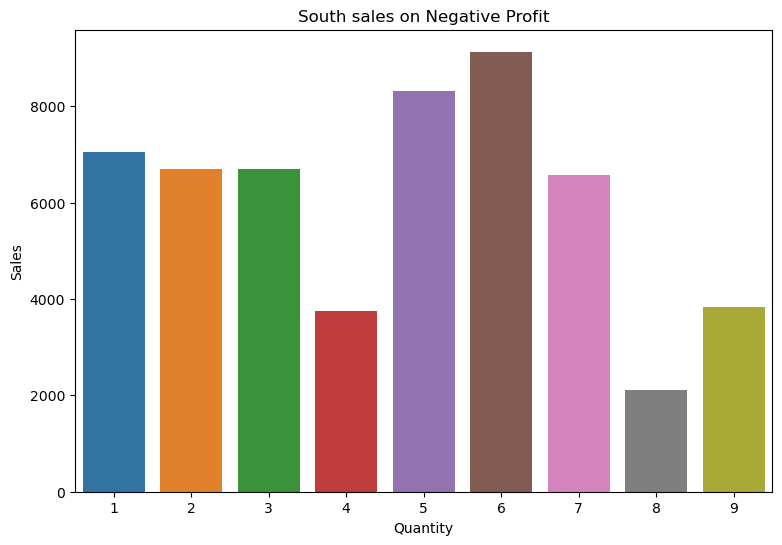

In [152]:
plt.figure(figsize = (9,6))
sns.barplot(x= df_profit_South.index, y= df_profit_South.values)
plt.title("South sales on Negative Profit")
plt.ylabel("Sales")
plt.show()

### <b><font color= #FFFF00> Overall Visualization:

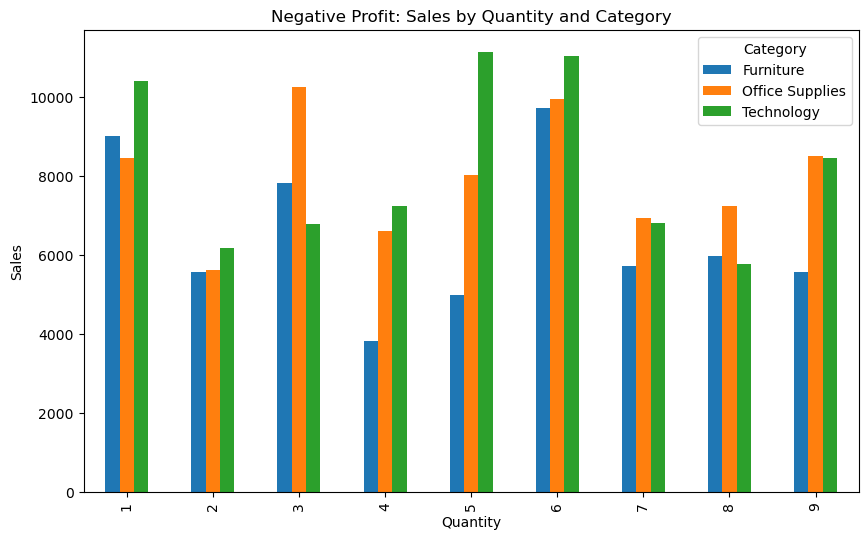

In [153]:
category_sales = df_neg_profit.pivot_table(index="Quantity", columns="Category", values="Sales", aggfunc="sum")
category_sales.plot(kind="bar", figsize=(10,6))
plt.title("Negative Profit: Sales by Quantity and Category")
plt.ylabel("Sales")
plt.show()

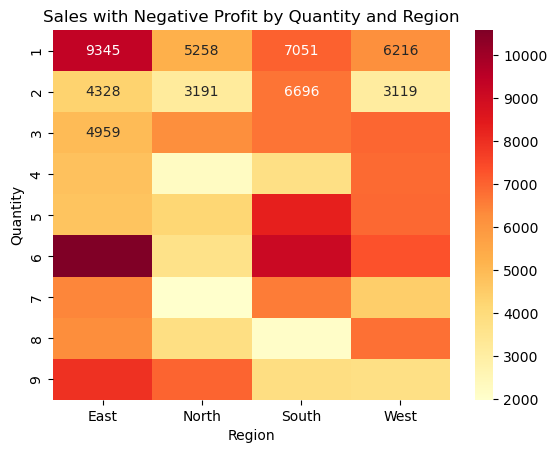

In [154]:
region_quantity = df_neg_profit.pivot_table(index="Quantity", columns="Region", values="Sales", aggfunc="sum")
sns.heatmap(region_quantity, annot=True, cmap="YlOrRd", fmt=".0f")
plt.title("Sales with Negative Profit by Quantity and Region")
plt.show()

### <b> <font color= #ABFF00> Conclusion:
- #### The same quantities — especially `1`, `3`, and `6` units — are showing up again and again in loss-making orders.
- #### This happens in all product categories (Furniture, Office Supplies, Technology).
- #### It also happens in all regions (East, West, North, South).
- #### This tells us that small quantity orders, even when they have high sales, are still not profitable.

### <b><font color= #FFFF00> Q4. Optimizing Product Mix for Regions:
#### *For each region, find the best-selling category by volume and the most profitable category. Are they the same? What does this imply?*

In [3]:
df_product_mix = pd.DataFrame(df)
df_product_mix.head()

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
0,ORD-100000,2024-08-10,CUST-2824,Jeffrey Jacobs,Velezburgh,East,Furniture,7,238.76,34.49
1,ORD-100001,2024-02-28,CUST-1409,Jacob Walker,South Alyssamouth,West,Office Supplies,4,675.17,159.79
2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49
3,ORD-100003,2023-11-26,CUST-5012,Maxwell Reed,Penamouth,East,Technology,5,113.07,20.42
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20


In [4]:
df_product_mix.groupby(["Region","Category"])["Sales"].sum()

Region  Category       
East    Furniture          44515.40
        Office Supplies    43166.97
        Technology         51097.55
North   Furniture          39738.54
        Office Supplies    40463.24
        Technology         39787.34
South   Furniture          40073.94
        Office Supplies    46950.11
        Technology         37103.00
West    Furniture          44470.98
        Office Supplies    39181.65
        Technology         41876.95
Name: Sales, dtype: float64

In [5]:
df_sales = df_product_mix.pivot_table(index= "Region", columns= "Category", values= "Sales", aggfunc= "sum")
df_sales

Category,Furniture,Office Supplies,Technology
Region,,,
East,44515.40,43166.97,51097.55
North,39738.54,40463.24,39787.34
South,40073.94,46950.11,37103.00
West,44470.98,39181.65,41876.95


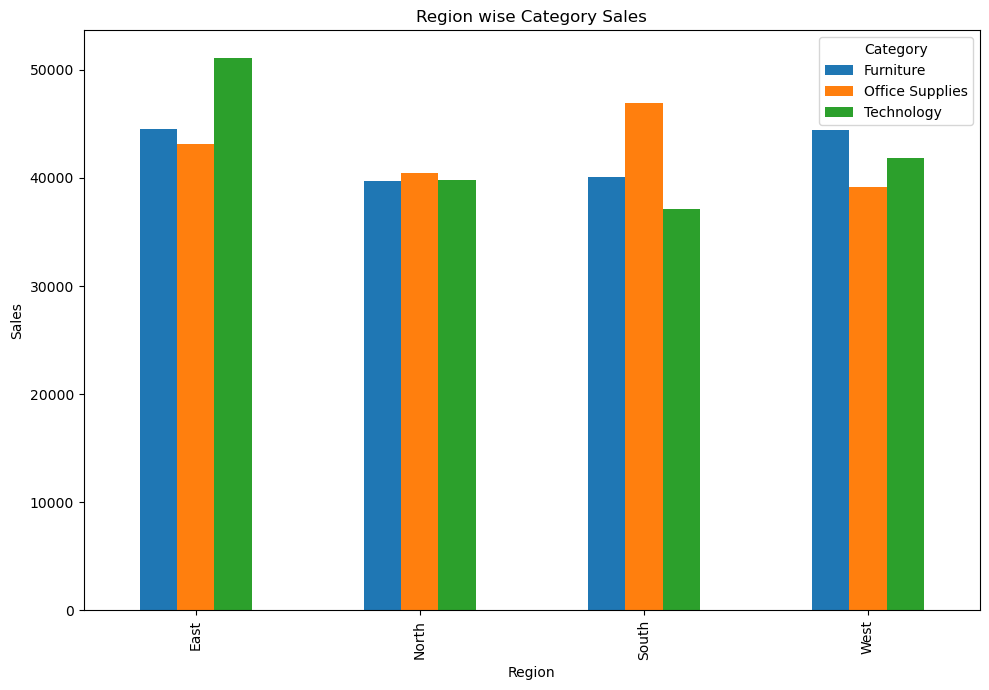

In [6]:
df_sales.plot(kind= "bar", figsize= (10,7))
plt.title("Region wise Category Sales")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

In [7]:
df_profit = df_product_mix.pivot_table(index= "Region", columns= "Category", values= "Profit", aggfunc= "sum")
df_profit

Category,Furniture,Office Supplies,Technology
Region,,,
East,2618.19,538.38,3137.44
North,3541.17,2836.63,1111.70
South,1089.64,3156.00,1052.92
West,3133.24,1929.09,1718.79


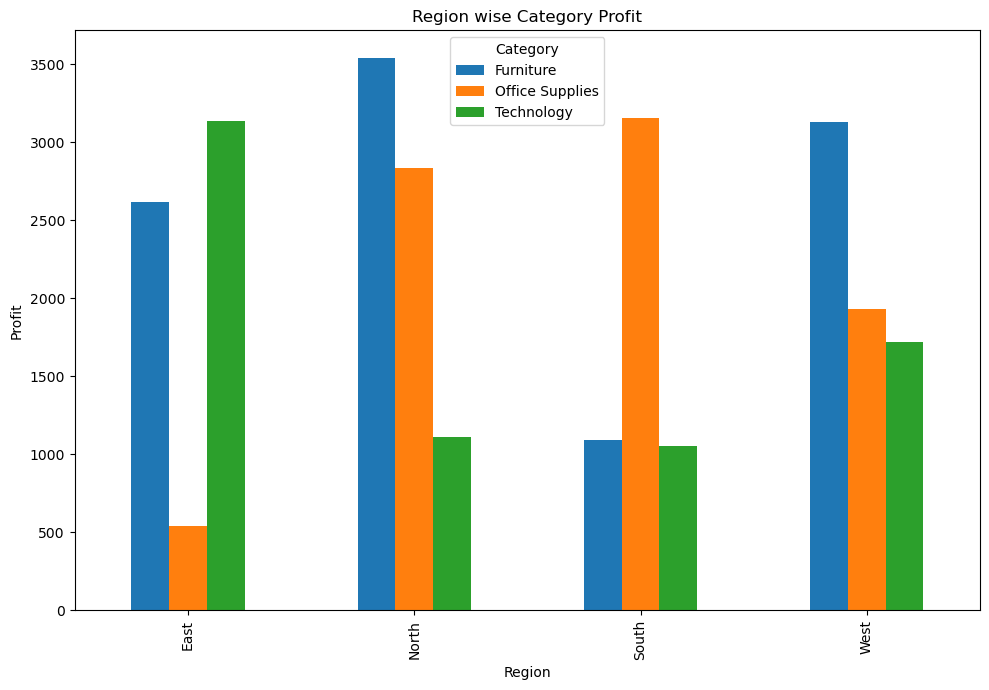

In [8]:
df_profit.plot(kind= "bar", figsize= (10,7))
plt.title("Region wise Category Profit")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

In [9]:
df_north_office = df_product_mix[(df_product_mix["Region"] == "North") & (df_product_mix["Category"] == "Office Supplies")]
df_north_office

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49
19,ORD-100019,2025-04-19,CUST-7873,Amy Hernandez,Smithland,North,Office Supplies,5,94.65,18.16
21,ORD-100021,2024-08-28,CUST-8359,Carol Doyle,Christopherhaven,North,Office Supplies,6,36.27,-7.16
53,ORD-100053,2023-08-22,CUST-2654,Katherine Davidson,Adammouth,North,Office Supplies,6,530.43,53.97
76,ORD-100076,2023-07-25,CUST-6168,James Davidson,Port Kathyberg,North,Office Supplies,8,523.73,63.52
...,...,...,...,...,...,...,...,...,...,...
950,ORD-100950,2024-11-04,CUST-3950,Michelle Carr,East David,North,Office Supplies,2,980.17,39.64
974,ORD-100974,2025-03-28,CUST-8484,Anna Newman,New Derekville,North,Office Supplies,3,919.74,-137.13
975,ORD-100975,2025-01-10,CUST-5949,Ricky Navarro,East Heather,North,Office Supplies,2,259.72,13.76
991,ORD-100991,2023-08-31,CUST-5689,Michael Dawson,Robertton,North,Office Supplies,7,221.38,60.49


In [10]:
df_north_neg = df_north_office[df_north_office["Profit"] < 0]
df_north_neg

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
21,ORD-100021,2024-08-28,CUST-8359,Carol Doyle,Christopherhaven,North,Office Supplies,6,36.27,-7.16
120,ORD-100120,2025-05-27,CUST-8433,Brad Adams,Vargaschester,North,Office Supplies,2,193.28,-13.36
123,ORD-100123,2025-04-11,CUST-9201,Tasha Andrews,Littlechester,North,Office Supplies,6,734.90,-55.28
188,ORD-100188,2024-03-15,CUST-3167,Jake Dean,Laurieshire,North,Office Supplies,3,361.08,-42.48
225,ORD-100225,2024-01-10,CUST-4872,Jennifer Henson,Martinville,North,Office Supplies,8,182.16,-7.58
287,ORD-100287,2024-06-03,CUST-4492,Cynthia Kline,South Wayne,North,Office Supplies,1,512.39,-70.13
294,ORD-100294,2024-04-30,CUST-7054,John Johnson,Leblancstad,North,Office Supplies,8,637.67,-55.10
323,ORD-100323,2024-08-31,CUST-1058,Heather Gomez,Lake Laura,North,Office Supplies,3,330.37,-59.13
335,ORD-100335,2024-01-30,CUST-1590,Richard Wright,Gilbertmouth,North,Office Supplies,5,228.56,-10.89
455,ORD-100455,2024-10-23,CUST-2193,Christine Henderson,Rachelfurt,North,Office Supplies,9,653.82,-5.28


In [11]:
office_positive_profit = df_north_office.groupby("Quantity")["Profit"].sum()
sum(office_positive_profit.values)

2836.63

In [12]:
office_negative_profit = df_north_neg.groupby("Quantity")["Profit"].sum()
sum(office_negative_profit.values)

-1306.1199999999997

In [13]:
df_north_furniture = df_product_mix[(df_product_mix["Region"] == "North") & (df_product_mix["Category"] == "Furniture")]
df_north_furniture

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
30,ORD-100030,2024-07-19,CUST-6514,Leah Bell,Wheelerport,North,Furniture,3,594.39,-28.05
39,ORD-100039,2023-11-25,CUST-8527,Nicole Ball,New Steven,North,Furniture,9,148.71,0.94
48,ORD-100048,2024-10-28,CUST-1750,Evan Cochran,East Williamshire,North,Furniture,2,637.14,77.20
49,ORD-100049,2025-03-04,CUST-4733,Tabitha Cole,Stevenmouth,North,Furniture,8,265.31,-44.46
52,ORD-100052,2024-02-23,CUST-4814,James Hogan,West Matthewfurt,North,Furniture,6,984.56,79.09
...,...,...,...,...,...,...,...,...,...,...
945,ORD-100945,2024-03-31,CUST-8056,Robert Austin,West Katherine,North,Furniture,5,535.00,119.85
949,ORD-100949,2025-04-07,CUST-7751,Rebecca Smith,New Kyleview,North,Furniture,6,299.89,-55.60
970,ORD-100970,2025-07-04,CUST-6661,Laura Browning,New Kelsey,North,Furniture,8,293.05,37.60
973,ORD-100973,2024-02-20,CUST-5097,Tracy Russell,Lake Damon,North,Furniture,1,848.05,219.75


In [14]:
df_north_fur_neg = df_north_office[df_north_office["Profit"] < 0]
df_north_fur_neg

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
21,ORD-100021,2024-08-28,CUST-8359,Carol Doyle,Christopherhaven,North,Office Supplies,6,36.27,-7.16
120,ORD-100120,2025-05-27,CUST-8433,Brad Adams,Vargaschester,North,Office Supplies,2,193.28,-13.36
123,ORD-100123,2025-04-11,CUST-9201,Tasha Andrews,Littlechester,North,Office Supplies,6,734.90,-55.28
188,ORD-100188,2024-03-15,CUST-3167,Jake Dean,Laurieshire,North,Office Supplies,3,361.08,-42.48
225,ORD-100225,2024-01-10,CUST-4872,Jennifer Henson,Martinville,North,Office Supplies,8,182.16,-7.58
287,ORD-100287,2024-06-03,CUST-4492,Cynthia Kline,South Wayne,North,Office Supplies,1,512.39,-70.13
294,ORD-100294,2024-04-30,CUST-7054,John Johnson,Leblancstad,North,Office Supplies,8,637.67,-55.10
323,ORD-100323,2024-08-31,CUST-1058,Heather Gomez,Lake Laura,North,Office Supplies,3,330.37,-59.13
335,ORD-100335,2024-01-30,CUST-1590,Richard Wright,Gilbertmouth,North,Office Supplies,5,228.56,-10.89
455,ORD-100455,2024-10-23,CUST-2193,Christine Henderson,Rachelfurt,North,Office Supplies,9,653.82,-5.28


In [15]:
Furniture_positive_profit = df_north_furniture.groupby("Quantity")["Profit"].sum()
sum(Furniture_positive_profit.values)

3541.17

In [16]:
Furniture_negative_profit = df_north_fur_neg.groupby("Quantity")["Profit"].sum()
sum(Furniture_negative_profit.values)

-1306.1199999999997

### <b> <font color= #ABFF00> Conclusion:
- #### In the East, West, and South regions, the category with the highest sales also gave the highest profit. This shows that the current product mix in these regions is working well.
- #### In the North region, Office Supplies had the highest sales, but Furniture made more profit.
- #### Even though the sales difference between Office Supplies and Furniture was small (₹724), the profit difference was meaningful (₹705).
- #### On deeper analysis, Office Supplies in North had more negative profit orders, while Furniture mostly made positive profits.

### <b><font color= #FFFF00> Q5. Demand Prediction Case:
#### *Using historical data, identify if there is a trend or seasonal pattern in quantity sold for each product category over time.*

In [17]:
df_trend_season = pd.DataFrame(df)
df_trend_season.head()

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
0,ORD-100000,2024-08-10,CUST-2824,Jeffrey Jacobs,Velezburgh,East,Furniture,7,238.76,34.49
1,ORD-100001,2024-02-28,CUST-1409,Jacob Walker,South Alyssamouth,West,Office Supplies,4,675.17,159.79
2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49
3,ORD-100003,2023-11-26,CUST-5012,Maxwell Reed,Penamouth,East,Technology,5,113.07,20.42
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20


In [18]:
df_trend_season["Order Date"] = pd.to_datetime(df_trend_season["Order Date"])

In [19]:
df_trend_season["Year"] = df_trend_season["Order Date"].dt.year

In [20]:
df_trend_season["Month"] = df_trend_season["Order Date"].dt.month

In [21]:
df_trend_season["Year-Month"] = df_trend_season["Order Date"].dt.to_period("M")

In [22]:
monthly_trend = df_trend_season.groupby(['Year-Month', 'Category'])['Quantity'].sum().reset_index()
monthly_trend

,Year-Month,Category,Quantity
0,2023-07,Furniture,4
1,2023-07,Office Supplies,61
2,2023-07,Technology,78
3,2023-08,Furniture,47
4,2023-08,Office Supplies,147
...,...,...,...
70,2025-06,Office Supplies,56
71,2025-06,Technology,100
72,2025-07,Furniture,10
73,2025-07,Office Supplies,39


In [23]:
pivot_df = monthly_trend.pivot(index='Year-Month', columns='Category', values='Quantity')
pivot_df

Category,Furniture,Office Supplies,Technology
Year-Month,,,
2023-07,4,61,78
2023-08,47,147,81
2023-09,67,87,46
2023-10,65,33,86
2023-11,54,44,50
2023-12,100,61,67
2024-01,73,53,76
2024-02,71,80,83
2024-03,49,86,50


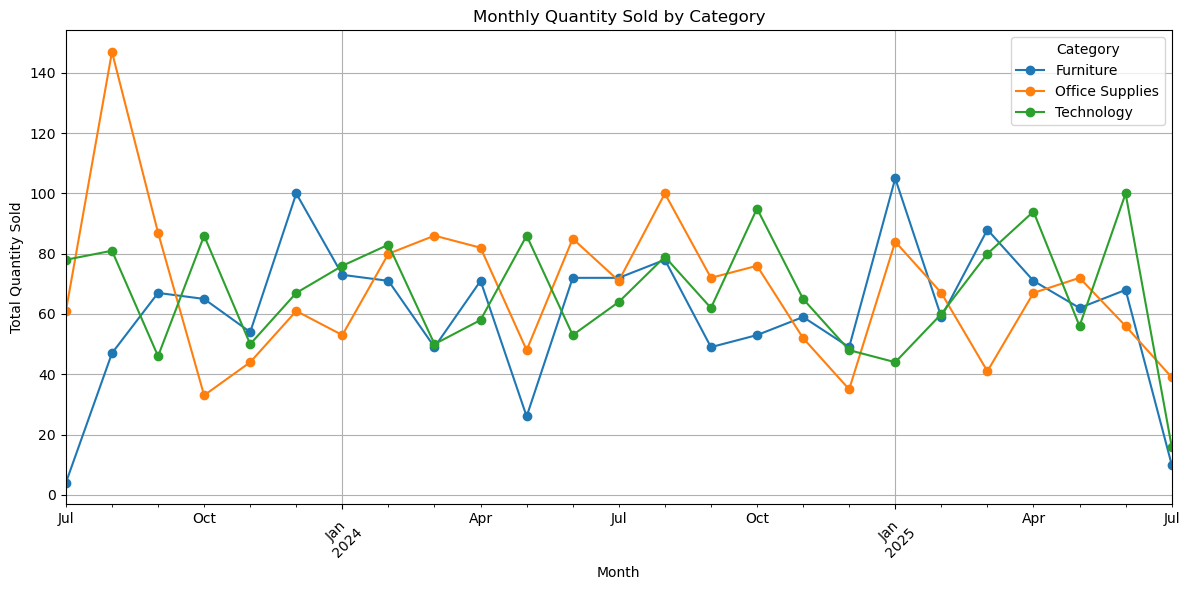

In [24]:
pivot_df.plot(figsize=(12,6), marker='o')
plt.title("Monthly Quantity Sold by Category")
plt.ylabel("Total Quantity Sold")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### <b> <font color= #ABFF00> Conclusion:
#### There is both a trend and seasonality present in the quantity sold over time:
- #### Trends: Increasing demand (especially for Office Supplies).
- #### Seasonality: Regular peaks at specific months across years.

### <b><font color= #FFFF00> Q6. Loss-Leading Product Investigation:
#### *Find products or categories that have repeatedly shown negative profit despite high sales. Should they be discontinued or repriced?*

In [25]:
df_high_sales = pd.DataFrame(df)
df_high_sales.head()

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
0,ORD-100000,2024-08-10,CUST-2824,Jeffrey Jacobs,Velezburgh,East,Furniture,7,238.76,34.49
1,ORD-100001,2024-02-28,CUST-1409,Jacob Walker,South Alyssamouth,West,Office Supplies,4,675.17,159.79
2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49
3,ORD-100003,2023-11-26,CUST-5012,Maxwell Reed,Penamouth,East,Technology,5,113.07,20.42
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20


In [26]:
neg_profit = df_high_sales[df_high_sales["Profit"] < 0]
neg_profit

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20
6,ORD-100006,2024-11-28,CUST-2679,Jamie Nguyen,East Ernest,East,Furniture,7,656.22,-128.18
7,ORD-100007,2024-07-03,CUST-9935,Jessica Pitts,West Michelle,East,Furniture,8,245.80,-18.84
10,ORD-100010,2024-03-11,CUST-1520,Collin Anderson,New Mandyburgh,South,Office Supplies,8,725.04,-109.05
13,ORD-100013,2025-01-08,CUST-4582,Taylor Owens,New Heidi,East,Furniture,6,403.21,-39.51
...,...,...,...,...,...,...,...,...,...,...
981,ORD-100981,2024-04-17,CUST-7248,Nicholas Cruz,Fisherborough,North,Technology,3,659.60,-38.76
988,ORD-100988,2024-12-31,CUST-1132,Eileen Vasquez,Kimberlyville,South,Technology,3,140.41,-8.25
989,ORD-100989,2024-03-18,CUST-1803,Nathan Evans,West Daniel,West,Furniture,2,728.72,-17.11
997,ORD-100997,2025-07-04,CUST-3240,Paul Beck,Samanthaview,North,Office Supplies,9,513.28,-50.13


In [27]:
neg_profit.groupby("Category")["Sales"].sum()

Category
Furniture          58127.21
Office Supplies    71508.92
Technology         73748.27
Name: Sales, dtype: float64

In [28]:
neg_profit.groupby("Category")["Profit"].sum()

Category
Furniture         -6214.81
Office Supplies   -6843.83
Technology        -7364.55
Name: Profit, dtype: float64

In [29]:
tech_sort = neg_profit[neg_profit["Category"] == "Technology"]
tech_sort

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
25,ORD-100025,2024-02-11,CUST-7924,Virginia Hansen,Bryanville,East,Technology,7,893.74,-88.27
28,ORD-100028,2025-01-26,CUST-3547,Barry Alvarez,West Michaelland,North,Technology,3,266.83,-9.75
43,ORD-100043,2024-05-13,CUST-2291,Laura Thomas,Susanfurt,West,Technology,7,801.86,-17.84
60,ORD-100060,2024-10-11,CUST-6820,Trevor Gutierrez,East Emilyborough,South,Technology,7,281.31,-48.03
70,ORD-100070,2024-01-07,CUST-5422,Brandon Reed,Port Nicole,West,Technology,9,604.51,-94.12
...,...,...,...,...,...,...,...,...,...,...
960,ORD-100960,2025-04-18,CUST-5161,Meghan Blair,Westside,South,Technology,6,378.45,-1.43
971,ORD-100971,2024-07-18,CUST-5901,Leslie Brown,South Derekside,West,Technology,3,817.79,-65.26
981,ORD-100981,2024-04-17,CUST-7248,Nicholas Cruz,Fisherborough,North,Technology,3,659.60,-38.76
988,ORD-100988,2024-12-31,CUST-1132,Eileen Vasquez,Kimberlyville,South,Technology,3,140.41,-8.25


In [40]:
tech_sort.groupby("Quantity").agg({
    "Quantity" : "count",
    "Sales" : "sum",
    "Profit" : "sum"
}).rename(columns= {"Quantity" : "Order_count"}).reset_index()

,Quantity,Order_count,Sales,Profit
0,1,19,10400.94,-965.17
1,2,14,6155.91,-710.43
2,3,14,6783.78,-812.00
3,4,16,7235.92,-604.46
4,5,19,11130.52,-1283.44
5,6,20,11033.73,-960.39
6,7,14,6800.03,-625.54
7,8,11,5772.87,-518.92
8,9,14,8434.57,-884.20


In [41]:
tot = tech_sort.groupby(["Quantity"])["Sales"].sum()
tot_sum = sum(tot)
per = (tot.values/tot_sum)*100

### <b> <font color= #ABFF00> Conclusion:
- #### The `Technology` category accounts for the highest volume of negative-profit transactions, especially in quantity groups of `1`,`5`, and `6` units.
- #### These three quantity buckets alone contribute `45%` of loss transactions, indicating that these sales are frequent and significant.
- #### Since these products are selling well (high sales count), it’s more financially sound to reprice them (increase unit price, reduce discount) rather than discontinue them.

### <b><font color= #FFFF00> Q7. Regional Sales Consistency:
#### *Which region shows the most stable monthly sales performance over time? Use standard deviation or coefficient of variation to support your analysis.*

In [3]:
df_std_cv = pd.DataFrame(df)
df_std_cv.head()

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
0,ORD-100000,2024-08-10,CUST-2824,Jeffrey Jacobs,Velezburgh,East,Furniture,7,238.76,34.49
1,ORD-100001,2024-02-28,CUST-1409,Jacob Walker,South Alyssamouth,West,Office Supplies,4,675.17,159.79
2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49
3,ORD-100003,2023-11-26,CUST-5012,Maxwell Reed,Penamouth,East,Technology,5,113.07,20.42
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20


In [4]:
df_std_cv["Order Date"] = pd.to_datetime(df_std_cv["Order Date"])

In [5]:
df_std_cv["month_year"] = df_std_cv["Order Date"].dt.to_period("M")

In [6]:
monthly_sales = df_std_cv.groupby(["Region", "month_year"])["Sales"].sum().reset_index()
monthly_sales

,Region,month_year,Sales
0,East,2023-07,3158.88
1,East,2023-08,4921.11
2,East,2023-09,4621.30
3,East,2023-10,3672.32
4,East,2023-11,4340.82
...,...,...,...
95,West,2025-03,5937.82
96,West,2025-04,9464.17
97,West,2025-05,6917.35
98,West,2025-06,6442.24


In [7]:
region_sales = monthly_sales.groupby("Region")["Sales"].agg(["mean","std"]).reset_index()
region_sales

,Region,mean,std
0,East,5551.1968,2032.315803
1,North,4799.5648,1752.124855
2,South,4965.0820,1859.621593
3,West,5021.1832,2306.793029


In [8]:
region_sales["cv"] = region_sales["std"] / region_sales["mean"]

In [9]:
region_sales.sort_values(by= "cv")

,Region,mean,std,cv
1,North,4799.5648,1752.124855,0.365059
0,East,5551.1968,2032.315803,0.366104
2,South,4965.0820,1859.621593,0.374540
3,West,5021.1832,2306.793029,0.459412


### <b> <font color= #ABFF00> Conclusion:
- #### Based on the coefficient of variation (CV) for monthly sales across regions, the North region has the most stable sales performance over time (CV = 0.36). 
- #### This indicates less fluctuation in monthly sales, making it the most consistent region in terms of sales.

### <b><font color= #FFFF00> Q8. Customer Retention Analysis:
#### *Based on Customer ID, find the number of repeats vs. one-time customers. How does their average profit and sales differ?*

In [4]:
df_customer = pd.DataFrame(df)

In [5]:
df_customer["Order Date"] = pd.to_datetime(df_customer["Order Date"])

In [6]:
df_customer.head()

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
0,ORD-100000,2024-08-10,CUST-2824,Jeffrey Jacobs,Velezburgh,East,Furniture,7,238.76,34.49
1,ORD-100001,2024-02-28,CUST-1409,Jacob Walker,South Alyssamouth,West,Office Supplies,4,675.17,159.79
2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49
3,ORD-100003,2023-11-26,CUST-5012,Maxwell Reed,Penamouth,East,Technology,5,113.07,20.42
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20


In [7]:
customer_count = df_customer["Customer ID"].value_counts()

In [8]:
df_customer["customer_type"] = df_customer["Customer ID"].apply(lambda x : "repeat" if customer_count[x] > 1 else "one_time")

In [9]:
df_customer["customer_type"].value_counts()

customer_type
one_time    912
repeat       88
Name: count, dtype: int64

In [10]:
customer_summary = df_customer.groupby("customer_type")[["Sales","Profit"]].sum()
customer_summary

,Sales,Profit
customer_type,,
one_time,462370.09,23145.79
repeat,46055.58,2717.40


In [11]:
customer_summary["per_sales"] = round((customer_summary["Sales"]/ customer_summary["Sales"].sum())*100, 2)

In [12]:
customer_summary["per_profit"] = round((customer_summary["Profit"]/ customer_summary["Profit"].sum())*100, 2)

In [13]:
customer_summary

,Sales,Profit,per_sales,per_profit
customer_type,,,,
one_time,462370.09,23145.79,90.94,89.49
repeat,46055.58,2717.40,9.06,10.51


### <b> <font color= #ABFF00> Conclusion:
- #### Out of all customers, only a small portion are repeat customers, and they contribute ~9% of sales and ~10.5% of profit.
- #### The majority of revenue is currently driven by one-time customers, showing a potential gap in customer retention.
- #### There is no significant profitability difference between repeat and one-time buyers, indicating a possible opportunity to re-engage one-time buyers into becoming repeat customers.

### <b><font color= #FFFF00> Q9. Bulk Buying Patterns:
#### *Are their specific cities or regions where customers consistently buy in higher quantities than average? What product categories are driving this?*

In [17]:
df_cit_reg = pd.DataFrame(df)

In [19]:
region_agg = df_cit_reg.groupby("Region")[["Quantity"]].agg(["count","std","mean"]).reset_index()

In [20]:
region_agg["total_avg"] = df_cit_reg["Quantity"].mean()

In [21]:
region_agg

Region Quantity                     total_avg
            count       std      mean          
0   East      274  2.633198  4.981752     4.898
1  North      241  2.708019  4.842324     4.898
2  South      234  2.501608  4.747863     4.898
3   West      251  2.570603  5.000000     4.898

In [22]:
a = df_cit_reg["City"].value_counts().reset_index()
a.columns = ["City", "count"]
b = a[a["count"] > 1]

In [23]:
city_filter = df_cit_reg[df_cit_reg["City"].isin(b["City"])]

In [24]:
city_agg = city_filter.groupby("City")[["Quantity"]].agg(["count","mean","std"]).reset_index()

In [25]:
city_agg["total_avg"] = df_cit_reg["Quantity"].mean()

### <b> <font color= #ABFF00> Conclusion:
- #### The East and West regions show slightly above-average bulk buying behavior, with mean quantities above the overall average `(4.898)`.
- #### Standard deviation across regions is relatively consistent, indicating stable purchasing patterns.
- #### City-level analysis was inconclusive, as most cities appeared only once in the dataset and do not provide enough volume to draw meaningful conclusions.

### <b><font color= #FFFF00> Q10. Sales Efficiency Score:
#### *Create a new metric: Profit per Unit Sold. Rank cities based on this efficiency. What actionable insights can Walmart take?*

In [27]:
df_pro_per_unit = pd.DataFrame(df)
df_pro_per_unit.head()

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
0,ORD-100000,2024-08-10,CUST-2824,Jeffrey Jacobs,Velezburgh,East,Furniture,7,238.76,34.49
1,ORD-100001,2024-02-28,CUST-1409,Jacob Walker,South Alyssamouth,West,Office Supplies,4,675.17,159.79
2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49
3,ORD-100003,2023-11-26,CUST-5012,Maxwell Reed,Penamouth,East,Technology,5,113.07,20.42
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20


In [28]:
df_city_cal = df_pro_per_unit.groupby("City")[["Quantity", "Profit"]].sum().reset_index()
df_city_cal.columns = ["City", "Quantity", "Profit"]
df_city_cal

,City,Quantity,Profit
0,Aaronfort,8,34.54
1,Adammouth,6,53.97
2,Adamshaven,5,84.07
3,Alexanderfort,3,69.73
4,Alexanderfurt,3,-58.10
...,...,...,...
954,Williamsmouth,2,74.19
955,Wilsonfort,8,0.64
956,Wolfland,3,21.41
957,Wrightchester,9,23.33


In [29]:
df_city_cal["Per_unit"] = df_city_cal["Profit"] / df_city_cal["Quantity"]
df_city_cal

,City,Quantity,Profit,Per_unit
0,Aaronfort,8,34.54,4.317500
1,Adammouth,6,53.97,8.995000
2,Adamshaven,5,84.07,16.814000
3,Alexanderfort,3,69.73,23.243333
4,Alexanderfurt,3,-58.10,-19.366667
...,...,...,...,...
954,Williamsmouth,2,74.19,37.095000
955,Wilsonfort,8,0.64,0.080000
956,Wolfland,3,21.41,7.136667
957,Wrightchester,9,23.33,2.592222


In [30]:
top_10_profit = df_city_cal.sort_values(by= "Per_unit", ascending= False).head(10)
top_10_profit

,City,Quantity,Profit,Per_unit
165,East Stephanie,1,245.92,245.92
593,North Savannah,1,224.53,224.53
325,Lake Damon,1,219.75,219.75
881,Wendystad,1,213.10,213.10
523,New Vincentborough,1,204.10,204.10
356,Lake Maryfort,1,202.48,202.48
81,Cowanland,1,200.42,200.42
397,Lesterview,1,200.25,200.25
82,Craigport,1,200.23,200.23
202,Garnerland,1,197.31,197.31


In [32]:
bottom_10_profit = df_city_cal.sort_values(by= "Per_unit").head(10)
bottom_10_profit

,City,Quantity,Profit,Per_unit
479,New Frank,1,-157.74,-157.74
185,Ericksonhaven,1,-153.52,-153.52
406,Lopezfort,1,-149.64,-149.64
745,Rubenton,1,-147.55,-147.55
425,Mckinneystad,1,-146.99,-146.99
865,Trujillofurt,1,-125.34,-125.34
354,Lake Mariah,1,-123.98,-123.98
786,South Davidside,1,-117.55,-117.55
761,Shanemouth,1,-116.70,-116.70
616,Patrickfurt,1,-107.07,-107.07


### <b> <font color= #ABFF00> Conclusion:
#### A new metric, Profit per Unit Sold, was created to evaluate the sales efficiency of each city.
- #### The top 10 cities generate high profit per unit, indicating strong product mix or premium customer segments.
- #### The bottom 10 cities show low or negative efficiency, possibly due to high volume of low-margin items or higher return rates.
#### Actionable insights for Walmart:
- #### Focus on expanding profitable categories in high-efficiency cities.
- #### In low-efficiency cities, re-evaluate pricing, optimize product assortment, or address operational inefficiencies.

### <b><font color= #FFFF00> Q11. Sales Efficiency Score:
#### *Is there a negative correlation between quantity sold and profit per unit in any region or category? What does this suggest?*

In [33]:
df_neg_reg = pd.DataFrame(df)

In [34]:
region_regg = df_neg_reg.groupby("Region")[["Quantity","Profit"]].sum().reset_index()
region_regg.columns = ["Region", "Quantity", "Profit"]
region_regg["Per_Unit"] = region_regg["Profit"] / region_regg["Quantity"]
region_regg

,Region,Quantity,Profit,Per_Unit
0,East,1365,6294.01,4.610996
1,North,1167,7489.50,6.417738
2,South,1111,5298.56,4.769181
3,West,1255,6781.12,5.403283


In [35]:
a = region_regg.drop("Region", axis= 1)

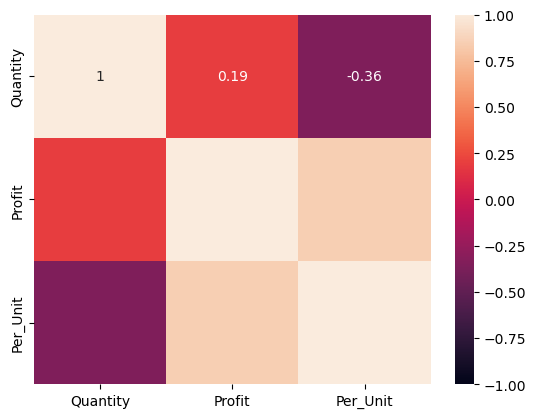

In [37]:
region_cor = a.corr()
sns.heatmap(region_cor,vmin= -1, vmax= 1 ,annot= True)
plt.show()

In [38]:
cat_regg = df_neg_reg.groupby("Category")[["Quantity","Profit"]].sum().reset_index()
cat_regg.columns = ["Category", "Quantity", "Profit"]
cat_regg["Per_Unit"] = cat_regg["Profit"] / cat_regg["Quantity"]
cat_regg

,Category,Quantity,Profit,Per_Unit
0,Furniture,1522,10382.24,6.821445
1,Office Supplies,1699,8460.10,4.979459
2,Technology,1677,7020.85,4.186553


In [39]:
b = cat_regg.drop("Category", axis= 1)

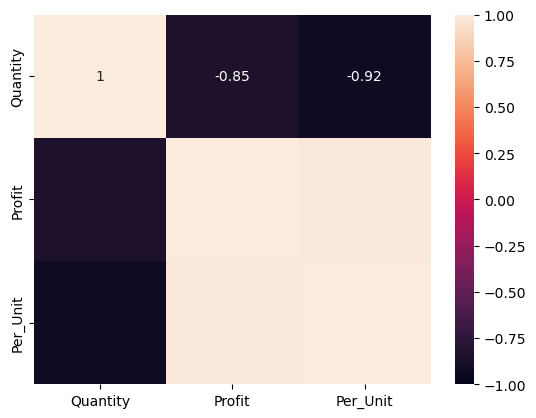

In [40]:
cat_cor = b.corr()
sns.heatmap(cat_cor,vmin= -1, vmax= 1 ,annot= True)
plt.show()

### <b> <font color= #ABFF00> Conclusion:
- #### According to the region segment – Yes negative correlation between quantity sold and profit per unit is occurring and negative correlation value = `-0.36`.
- #### According to the Category segment – Yes negative correlation between quantity sold and profit per unit is occurring and Occurring negative correlation value = `-0.92`.

### <b><font color= #FFFF00> Q12. Campaign Impact Simulation:
#### *Assume Walmart ran a 10% discount campaign in August 2024. Recalculate profit for that month and evaluate how the campaign would have affected overall profitability.*

In [6]:
df_aug_10 = pd.DataFrame(df)
df_aug_10.head()

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
0,ORD-100000,2024-08-10,CUST-2824,Jeffrey Jacobs,Velezburgh,East,Furniture,7,238.76,34.49
1,ORD-100001,2024-02-28,CUST-1409,Jacob Walker,South Alyssamouth,West,Office Supplies,4,675.17,159.79
2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49
3,ORD-100003,2023-11-26,CUST-5012,Maxwell Reed,Penamouth,East,Technology,5,113.07,20.42
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20


In [7]:
df_extract_aug = df_aug_10[(df_aug_10["Order Date"] >= "2024-08-01") & (df_aug_10["Order Date"] <= "2024-08-31")]
df_extract_aug.reset_index().head()

,index,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
0,0,ORD-100000,2024-08-10,CUST-2824,Jeffrey Jacobs,Velezburgh,East,Furniture,7,238.76,34.49
1,2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49
2,21,ORD-100021,2024-08-28,CUST-8359,Carol Doyle,Christopherhaven,North,Office Supplies,6,36.27,-7.16
3,47,ORD-100047,2024-08-20,CUST-2139,Kayla Hall,North David,South,Office Supplies,4,546.22,22.11
4,65,ORD-100065,2024-08-03,CUST-9751,Calvin Martin,South Vanessashire,East,Furniture,5,20.89,1.22


In [8]:
august_10_per = df_extract_aug["Profit"] - (df_extract_aug["Profit"] / 100) * 10
august_10_per.head()

0     31.041
2      3.141
21    -6.444
47    19.899
65     1.098
Name: Profit, dtype: float64

In [9]:
seperate_aug = df_aug_10["Profit"].sum() - df_extract_aug["Profit"].sum()
seperate_aug

25070.430000000004

In [10]:
overall_10_profit = seperate_aug + august_10_per.sum()
overall_10_profit

25783.914000000004

In [11]:
without_dis = round(df_aug_10["Profit"].sum() / df_aug_10["Profit"].count(), 2)
without_dis

25.86

In [12]:
with_10_dis = round(overall_10_profit / df_aug_10["Profit"].count(), 2)
with_10_dis

25.78

### <b> <font color= #ABFF00> Conclusion:
##### *Before 10% discount: ₹25.86 profit/order*
##### *After discount: ₹25.78 profit/order*
##### *Impact = only ₹0.08 difference*
- #### This indicates that Walmart can safely run such discount campaigns without significantly harming profitability.
- #### If the discount leads to even a small boost in sales volume, the overall profit may actually increase.

### <b><font color= #FFFF00> Q13. Return Risk Zones:
#### *If high-quantity orders with low profit are considered risky for returns, which region shows the highest risk exposure?*

In [13]:
df_return_risk = pd.DataFrame(df)

In [14]:
df_return_risk.groupby(["Region", "Quantity"])[["Quantity", "Profit"]].sum()

Quantity   Profit
Region Quantity                   
East   1               35  1335.42
       2               58  1158.11
       3              105   606.59
       4               76   387.16
       5              135   552.92
       6              216   542.92
       7              238  1041.43
       8              232   380.41
       9              270   289.05
North  1               38  1504.67
       2               38   596.46
       3              102   596.57
       4              112  2088.58
       5              105   423.76
       6              120   214.79
       7              161   790.29
       8              248  1069.09
       9              243   205.29
South  1               31  1043.67
       2               48  -221.11
       3               75   355.70
       4              112   904.62
       5              180  1074.40
       6              162  -405.95
       7              161   490.97
       8              144  1104.64
       9              198   951.62
West   1               32  1579.14
       2               42   519.85
       3               84   210.80
       4              112   708.67
       5              160   911.19
       6              150   472.21
       7              196  1192.76
       8              272   296.07
       9              207   890.43

In [15]:
sep_east = df_return_risk[(df_return_risk["Region"] == "East") & (df_return_risk["Quantity"] == 9)]
q_east = sep_east["Quantity"].sum()
p_east = sep_east["Profit"].sum()

In [16]:
sep_east = df_return_risk[(df_return_risk["Region"] == "South") & (df_return_risk["Quantity"] == 9)]
q_south = sep_east["Quantity"].sum()
p_south = sep_east["Profit"].sum()

In [17]:
sep_east = df_return_risk[(df_return_risk["Region"] == "North") & (df_return_risk["Quantity"] == 8)]
q_north = sep_east["Quantity"].sum()
p_north = sep_east["Profit"].sum()

In [18]:
sep_east = df_return_risk[(df_return_risk["Region"] == "West") & (df_return_risk["Quantity"] == 8)]
q_west = sep_east["Quantity"].sum()
p_west = sep_east["Profit"].sum()

In [19]:
join = pd.DataFrame({
    "Quantity_count" : [q_east, q_south, q_north, q_west],
    "Profit_sum" : [p_east, p_south, p_north, p_west]
             }, index= ["east", "south", "north", "west"])

In [20]:
join["Profit_perc"] = (join["Profit_sum"] / join["Profit_sum"].sum()) * 100
join

,Quantity_count,Profit_sum,Profit_perc
east,270,289.05,11.092435
south,198,951.62,36.518883
north,248,1069.09,41.026851
west,272,296.07,11.361831


### <b> <font color= #ABFF00> Conclusion:
##### *Based on the Region segmentation East region has Quantity count is 270, total profit is 289.05, and percentage is 11.09% contribution.*
- #### East has high quantity but very low profit, so it is most at risk.

### <b><font color= #FFFF00> Q14. Return Risk Zones:
#### *Calculate how many days (based on order date) it took each region to cross a cumulative profit of ₹5,000. Who was fastest?*

In [7]:
df_time = df.copy()
df_time.head()

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
0,ORD-100000,2024-08-10,CUST-2824,Jeffrey Jacobs,Velezburgh,East,Furniture,7,238.76,34.49
1,ORD-100001,2024-02-28,CUST-1409,Jacob Walker,South Alyssamouth,West,Office Supplies,4,675.17,159.79
2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49
3,ORD-100003,2023-11-26,CUST-5012,Maxwell Reed,Penamouth,East,Technology,5,113.07,20.42
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20


In [21]:
filter_1 = df_time.groupby(["Region", "Order Date"])["Profit"].sum().reset_index()
filter_1 = filter_1.sort_values(["Region", "Order Date"])
filter_1["cumsum"] = filter_1.groupby("Region")["Profit"].cumsum()

In [22]:
filter_2 = filter_1[filter_1["cumsum"] > 1000]
filter_2 = filter_2.groupby("Region")["Order Date"].first().reset_index()
filter_2.columns = ["Region", "Last_day"]
filter_2

,Region,Last_day
0,East,2023-10-20
1,North,2023-10-07
2,South,2023-08-14
3,West,2023-09-02


In [23]:
filter_3 = df_time.groupby(["Region"])["Order Date"].min().reset_index()
filter_3.columns = ["Region", "First_day"]
filter_3

,Region,First_day
0,East,2023-07-13
1,North,2023-07-12
2,South,2023-07-11
3,West,2023-07-14


In [24]:
day_count = pd.merge(filter_2, filter_3, on= "Region")
day_count["Day_counts"] = day_count["Last_day"] - day_count["First_day"]
day_count

,Region,Last_day,First_day,Day_counts
0,East,2023-10-20,2023-07-13,99 days
1,North,2023-10-07,2023-07-12,87 days
2,South,2023-08-14,2023-07-11,34 days
3,West,2023-09-02,2023-07-14,50 days


### <b> <font color= #ABFF00> Conclusion:
- #### Based The South Region was the fastest to reach ₹1,000 profit in just 34 days from their first order date.
- #### This shows stronger early sales momentum or better margins in that region.

### <b><font color= #FFFF00> Q15. High-Impact Customer Recovery Plan:
#### *Identify the bottom 5% of customers by profit. Suggest a personalized sales strategy for them based on their past order behaviour.*

In [27]:
df_bottom = df.copy()

In [28]:
df_bottom.head()

,Order ID,Order Date,Customer ID,Customer Name,City,Region,Category,Quantity,Sales,Profit
0,ORD-100000,2024-08-10,CUST-2824,Jeffrey Jacobs,Velezburgh,East,Furniture,7,238.76,34.49
1,ORD-100001,2024-02-28,CUST-1409,Jacob Walker,South Alyssamouth,West,Office Supplies,4,675.17,159.79
2,ORD-100002,2024-08-26,CUST-5506,Jennifer Baker,East Anthonyburgh,North,Office Supplies,8,29.51,3.49
3,ORD-100003,2023-11-26,CUST-5012,Maxwell Reed,Penamouth,East,Technology,5,113.07,20.42
4,ORD-100004,2024-11-04,CUST-4657,Nicole Cox,Masonshire,South,Furniture,7,801.92,-96.20


In [133]:
df_filter = df_bottom.groupby(["Customer ID"])["Profit"].sum().reset_index()
df_filter = df_fil.sort_values(by= "Profit")

In [134]:
df_fill_5 = round((df_filter["Profit"].count()/100)*5)
bottom_5 = df_filter.head(df_fill_5)

In [135]:
filtered_bottom_5 = df_bottom[df_bottom["Customer ID"].isin(bottom_5["Customer ID"])]

In [136]:
analysis_bottom = filtered_bottom_5.groupby("Quantity")[["Quantity","Sales","Profit"]].sum()
analysis_bottom.columns = ["Quantity_counts", "Sales", "Profit"]
analysis_bottom.reset_index()

,Quantity,Quantity_counts,Sales,Profit
0,1,8,6118.52,-1121.46
1,2,8,3327.64,-568.02
2,3,21,5876.69,-938.51
3,4,8,1820.96,-305.06
4,5,30,5111.88,-800.24
5,6,54,7737.05,-1322.95
6,7,14,1112.09,-131.00
7,8,32,3039.40,-571.50
8,9,63,5934.64,-938.79


In [137]:
analysis_bottom["Quantity_per"] = round((analysis_bottom["Quantity_counts"] / analysis_bottom["Quantity_counts"].sum())*100)

In [138]:
analysis_bottom["Sales_per"] = round((analysis_bottom["Sales"] / analysis_bottom["Sales"].sum())*100)

In [139]:
analysis_bottom["Profit_per"] = round((analysis_bottom["Profit"] / analysis_bottom["Profit"].sum())*100)

In [140]:
analysis_bottom

,Quantity_counts,Sales,Profit,Quantity_per,Sales_per,Profit_per
Quantity,,,,,,
1,8,6118.52,-1121.46,3.0,15.0,17.0
2,8,3327.64,-568.02,3.0,8.0,8.0
3,21,5876.69,-938.51,9.0,15.0,14.0
4,8,1820.96,-305.06,3.0,5.0,5.0
5,30,5111.88,-800.24,13.0,13.0,12.0
6,54,7737.05,-1322.95,23.0,19.0,20.0
7,14,1112.09,-131.00,6.0,3.0,2.0
8,32,3039.40,-571.50,13.0,8.0,9.0
9,63,5934.64,-938.79,26.0,15.0,14.0


### <b> <font color= #ABFF00> Conclusion:
#### All 48 customers in the bottom 5% are one-time customers.
#### High-quantity buyers (Qty > 4) among them are responsible for:
- #### *80% of Quantity*
- #### *60% of Sales*
- #### *56% of (Negative) Profit*
#### These may be discount-driven buyers → suggesting repricing to improve profit.